<img src="./logo_UTN.svg" align="right" width="150"> 

# Tarea Semanal 9 - Laboratorio de Filtrado Digital
#### Autor: Tobías Guerrero

## 1. Consigna

En esta tarea semanal, se pide el diseño de dos filtros digitales, uno FIR y otro IIR, ambos para cumplir con la siguiente plantilla: 

<img src="./plantilla.png" align="center"> 

En ambos casos, se pide analizar sobre el filtro diseñado:
- Módulo
- Fase
- Retardo
- Respuesta al impulso

Luego del diseño, se propone utilizar ambos filtros en una señal de ECG, para finalmente comparar el desempeño de ambos.
Como material de apoyo, se cuenta con el siguiente notebook de referencia: 
https://nbviewer.org/github/marianux/jupytest/blob/master/Laboratorio%20de%20filtrado%20digital.ipynb

## 2. Diseño

In [3]:
# Librerías a utilizar
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import plot_plantilla
import scipy.io as io
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Plantilla
ripple = 0.01
atenuacion = 40

fs = 1000
nyq = 500
ws1 = 1.0
wp1 = 3.0
wp2 = 25.0
ws2 = 35.0

ws = np.array([ws1 , ws2])
wp = np.array([wp1 , wp2])

frecs = [0.0 , ws1 , wp1 , wp2 , ws2 , nyq]
gains = [-atenuacion,-atenuacion,-ripple,-ripple,-atenuacion,-atenuacion]
gains = 10**(np.array(gains)/20)

### 2.1 Filtro IIR

In [49]:
# Diseño en formato numerador, denominador
num_iir , den_iir = signal.iirdesign(wp , ws , ripple , atenuacion, ftype = "butter", output = 'ba', fs = fs)

# Diseño en formato sección de segundo orden
sos_iir = signal.iirdesign(wp , ws , ripple , atenuacion, ftype = "butter", output = 'sos', fs = fs)

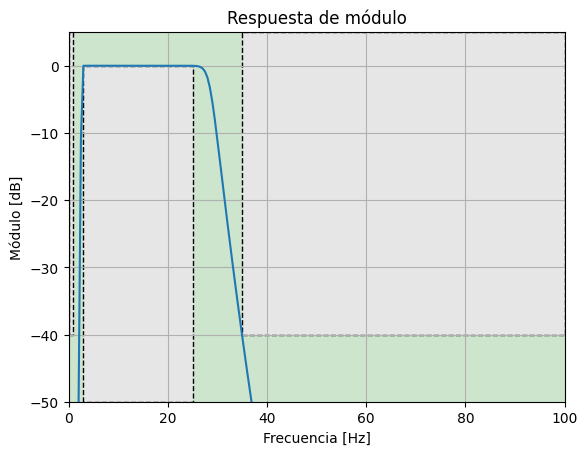

In [46]:
# Respuesta de módulo
w_iir, h_iir = signal.sosfreqz(sos, worN=1000)

ww_iir = w / np.pi * nyq

modulo_iir = plt.figure()
plt.title("Respuesta de módulo")
plt.plot(ww_iir , 20*np.log10(abs(h_iir)))
plt.ylabel("Módulo [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plt.axis([0,100,-50,5])
plot_plantilla(filter_type = 'bandpass' , fpass = wp , ripple = ripple , fstop = ws , attenuation = atenuacion, fs = fs)

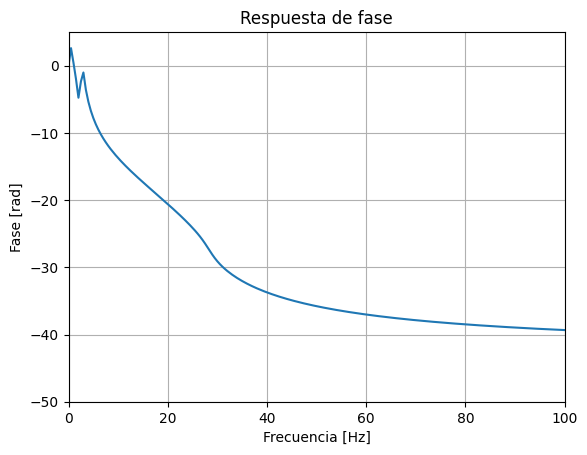

In [47]:
# Respuesta de fase
phase_iir = np.unwrap(np.angle(h_iir))

fase_iir = plt.figure()
plt.title("Respuesta de fase")
plt.plot(ww_iir, phase_iir)
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plt.axis([0,100,-50,5])
plt.show()

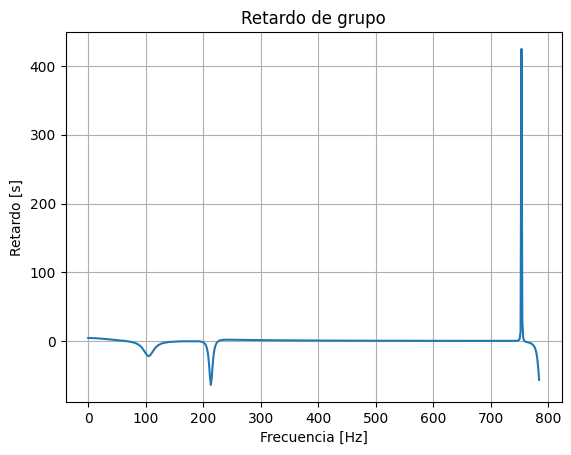

In [50]:
# Retardo de grupo
wd_iir , gd_iir = signal.group_delay([num_iir,den_iir], fs = fs)
fd_iir = wd_iir / 2*np.pi

retardo_iir = plt.figure()
plt.title("Retardo de grupo")
plt.plot(fd_iir, gd_iir)
plt.ylabel("Retardo [s]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plt.show()

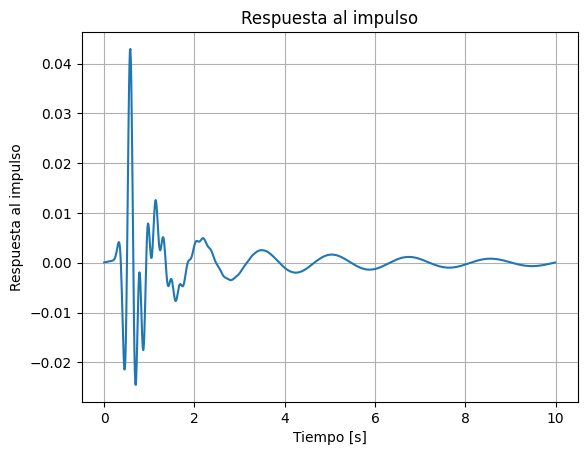

In [51]:
# Respuesta al impulso
t = np.arange(0 , 10 , 0.01)
imp_iir = np.fft.ifft(h_iir)

resp_impulso_iir = plt.figure()
plt.title("Respuesta al impulso")
plt.plot(t,imp_iir)
plt.ylabel("Respuesta al impulso")
plt.xlabel("Tiempo [s]")
plt.grid()
plt.show()

### 2.2 Filtro FIR

In [39]:
coef = 3001
den_fir = 1.0

taps = signal.firwin2(coef , frecs , gains , window = 'blackmanharris' , fs = fs)

w_fir, h_fir = signal.freqz(taps, den_fir, worN=1000)

ww_fir = w_fir / np.pi * nyq

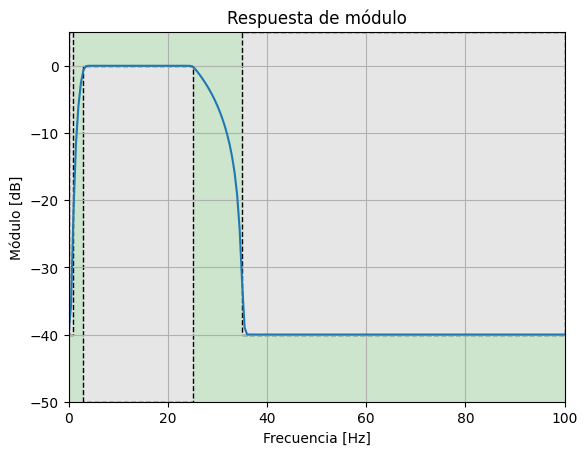

In [45]:
# Respuesta de módulo
modulo_fir = plt.figure()
plt.title("Respuesta de módulo")
plt.plot(ww_fir , 20*np.log10(abs(h)))
plt.axis([0,100,-50,5])
plt.ylabel("Módulo [dB]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plot_plantilla(filter_type = 'bandpass' , fpass = wp , ripple = ripple , fstop = ws , attenuation = atenuacion, fs = fs)

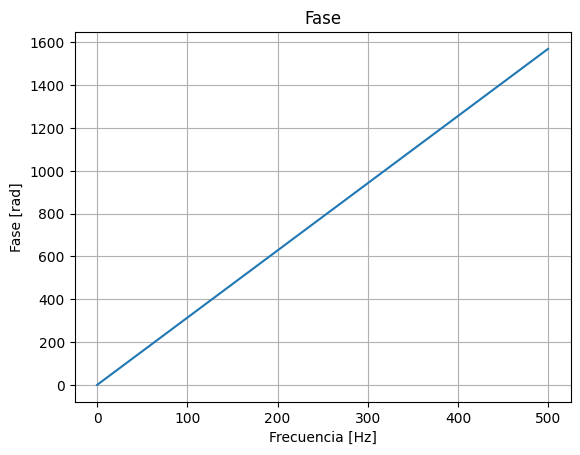

In [44]:
# Respuesta de fase
phase_fir = np.unwrap(np.angle(h_fir))

fase_fir = plt.figure()
plt.title("Fase")
plt.plot(ww_fir, phase_fir)
plt.ylabel("Fase [rad]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plt.show()

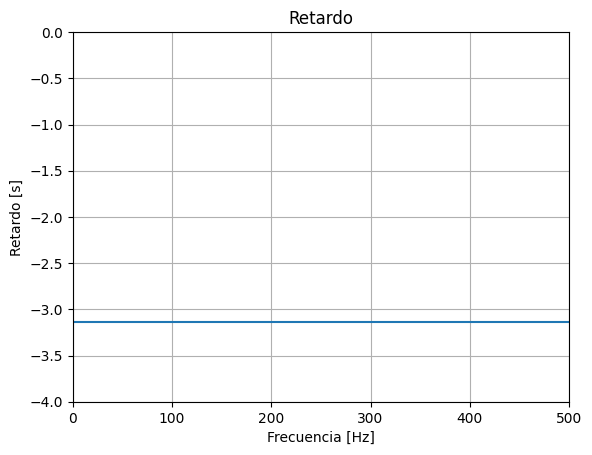

In [42]:
# Retardo de grupo
gd_fir = -np.diff(np.unwrap(np.angle(h_fir)))/np.diff(ww_fir)

retardo_fir = plt.figure()
plt.title("Retardo")
plt.plot(ww_fir[1:], gd_fir)
plt.ylabel("Retardo [s]")
plt.xlabel("Frecuencia [Hz]")
plt.grid()
plt.axis([0,500,-4,0])
plt.show()

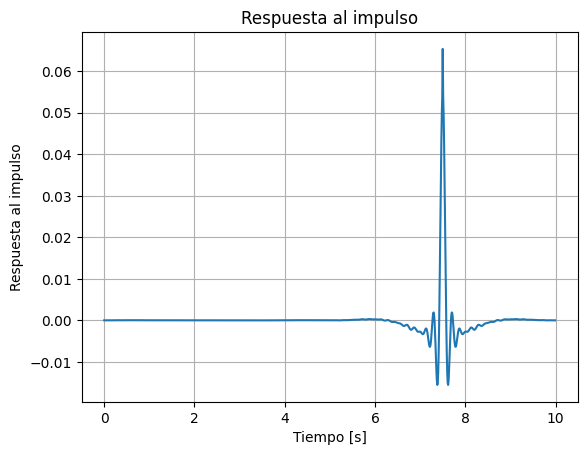

In [43]:
# Respuesta al impulso
t = np.arange(0 , 10 , 0.01)
imp_fir = np.fft.ifft(h_fir)

resp_impulso_fir = plt.figure()
plt.title("Respuesta al impulso")
plt.plot(t,imp_fir)
plt.ylabel("Respuesta al impulso")
plt.xlabel("Tiempo [s]")
plt.grid()
plt.show()

## 3. Implementación

### 3.1 Levantamiento de la señal

In [19]:
mat_struct = io.loadmat('ecg.mat')
ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

### 3.1 Filtro IIR

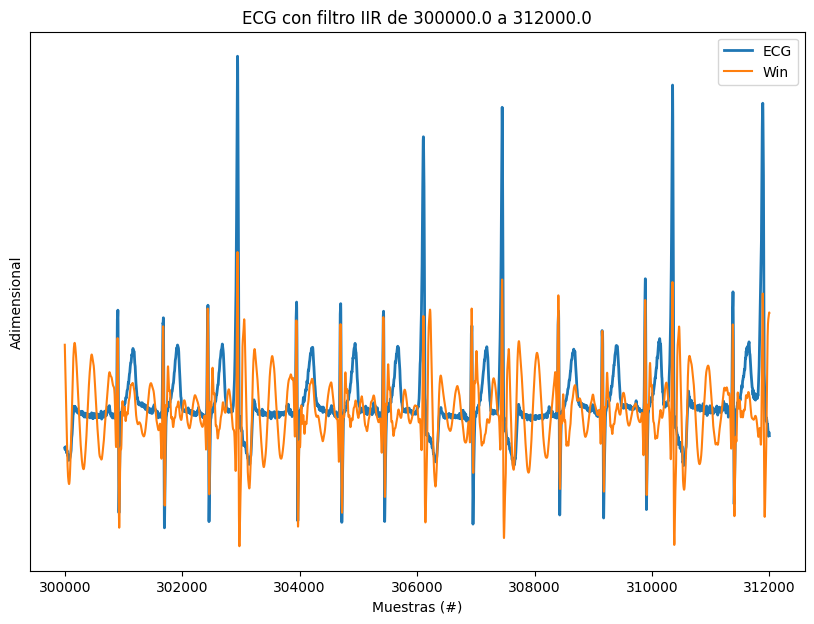

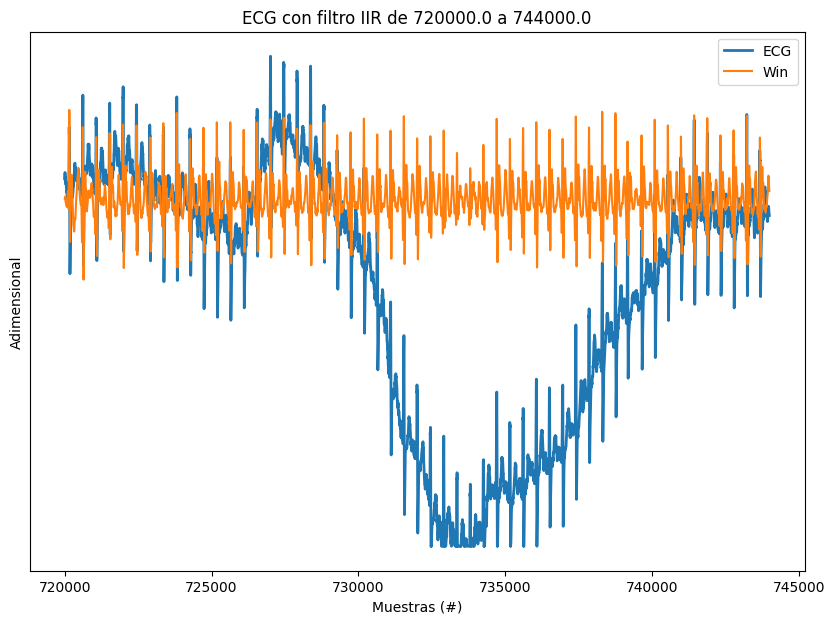

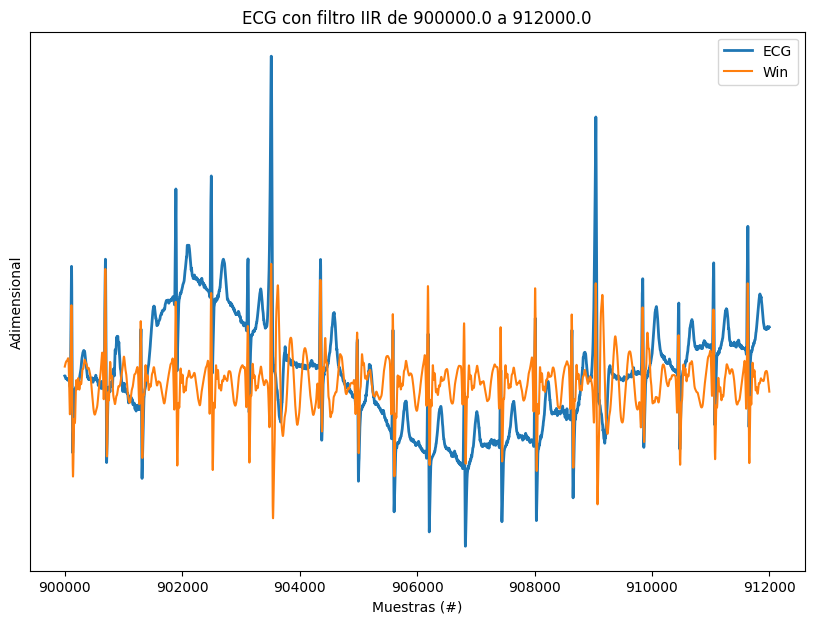

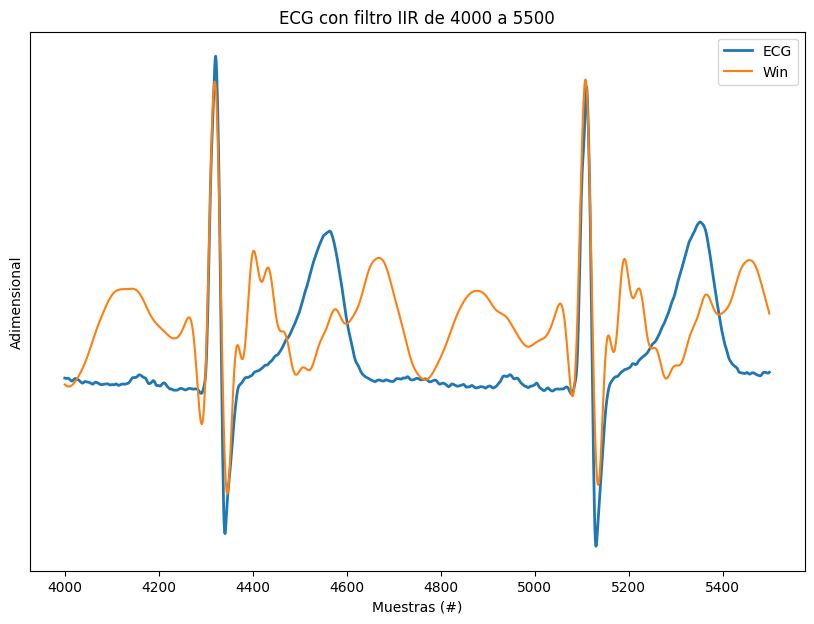

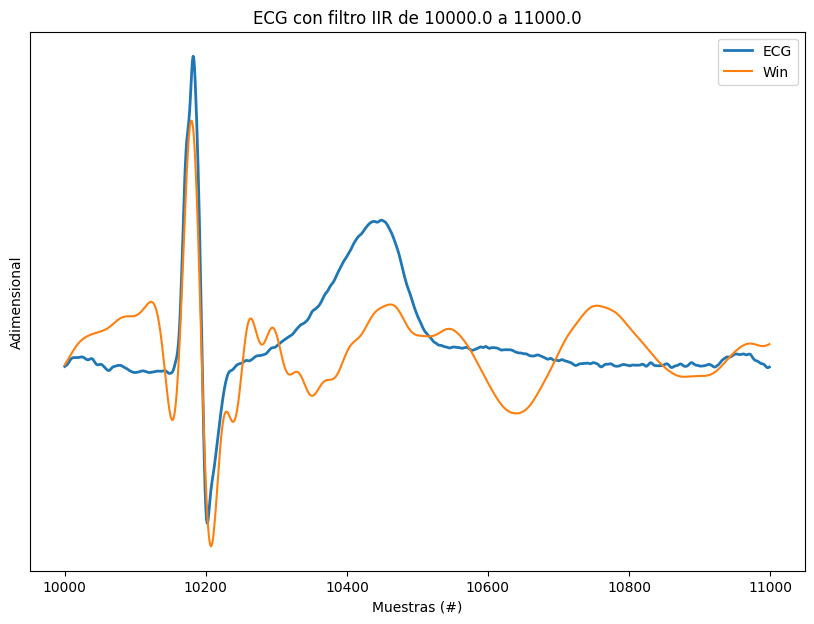

In [52]:
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
)

ECG_f_butt = signal.sosfilt(sos_iir, ecg_one_lead)

demora = 115

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    #plt.plot(zoom_region, ECG_f_butt[zoom_region], label='Butter')
    plt.plot(zoom_region, ECG_f_butt[zoom_region + demora], label='Win')
    
    plt.title('ECG con filtro IIR de ' + str(ii[0]) + ' a ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

### 3.2 Filtrado Bidireccional con IIR

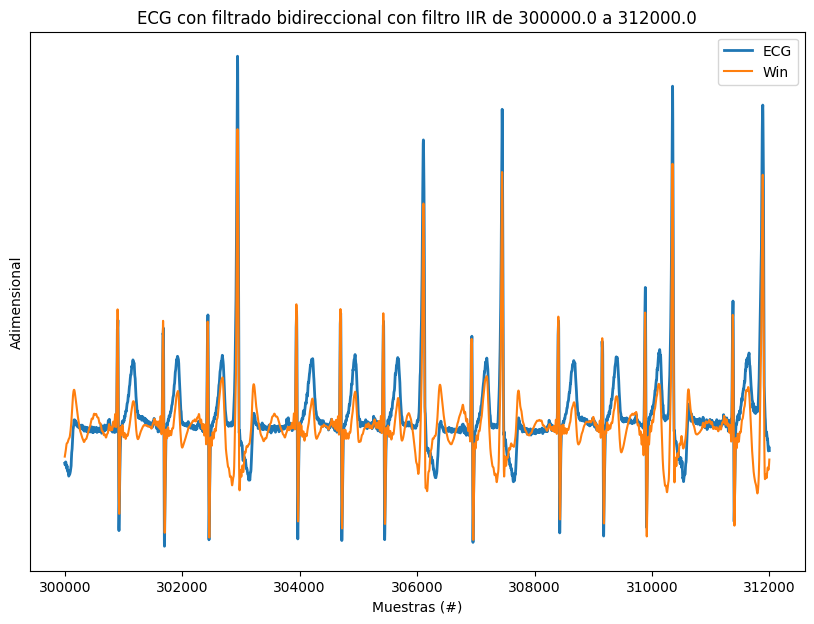

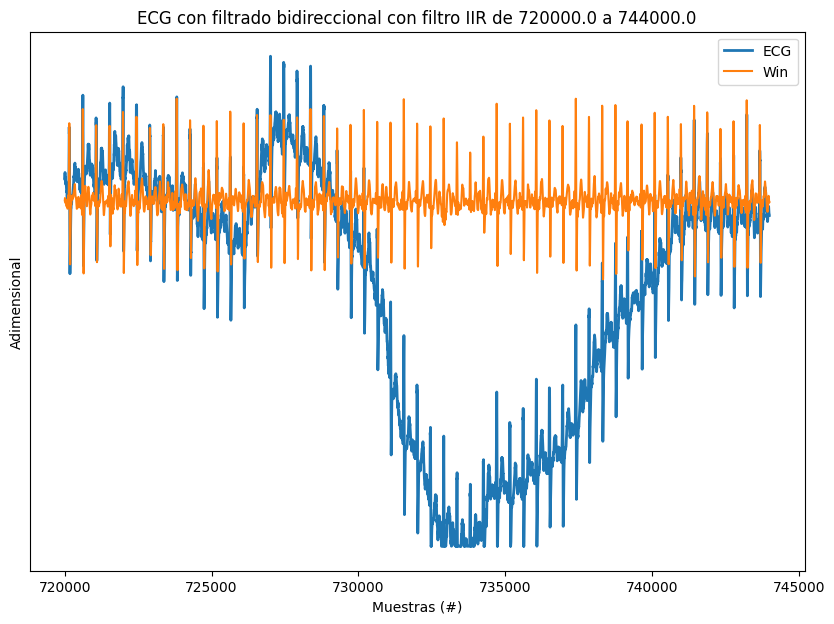

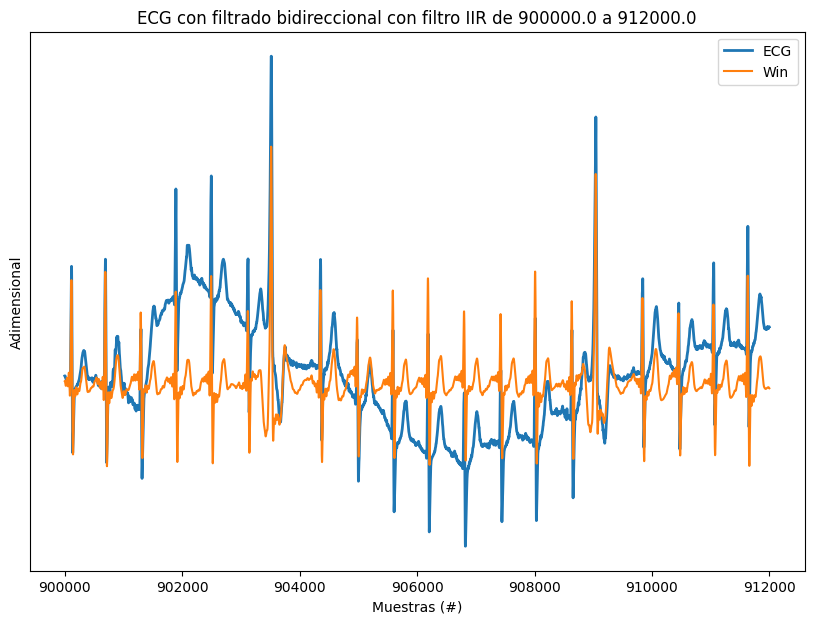

In [53]:
ECG_iir_b = signal.sosfiltfilt(sos_iir, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # Intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_iir_b[zoom_region], label='Win')
    
    plt.title('ECG con filtrado bidireccional con filtro IIR de ' + str(ii[0]) + ' a ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

### 3.3 Filtro FIR

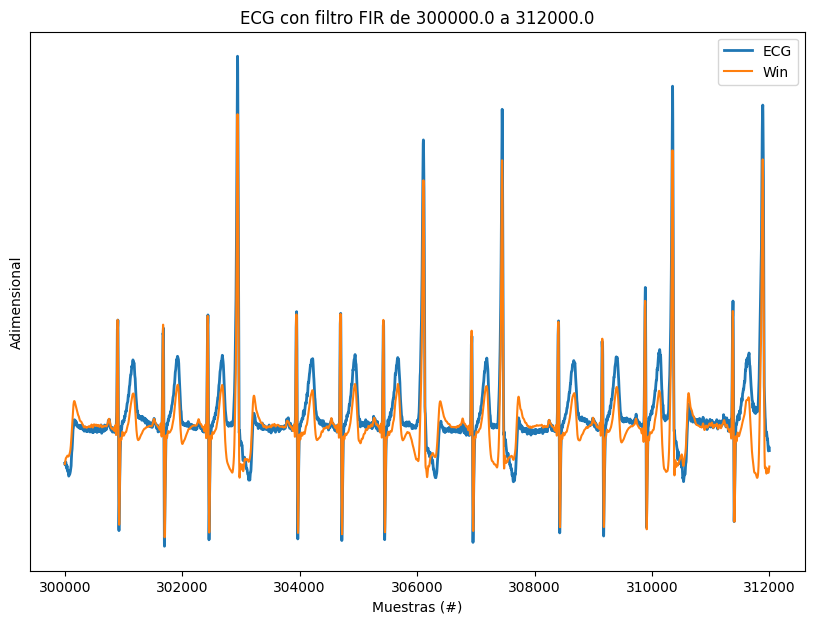

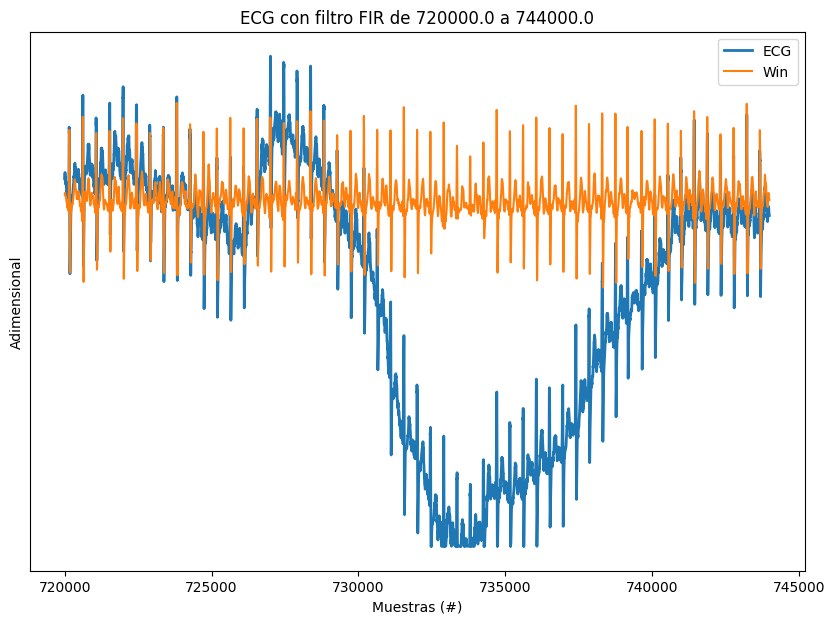

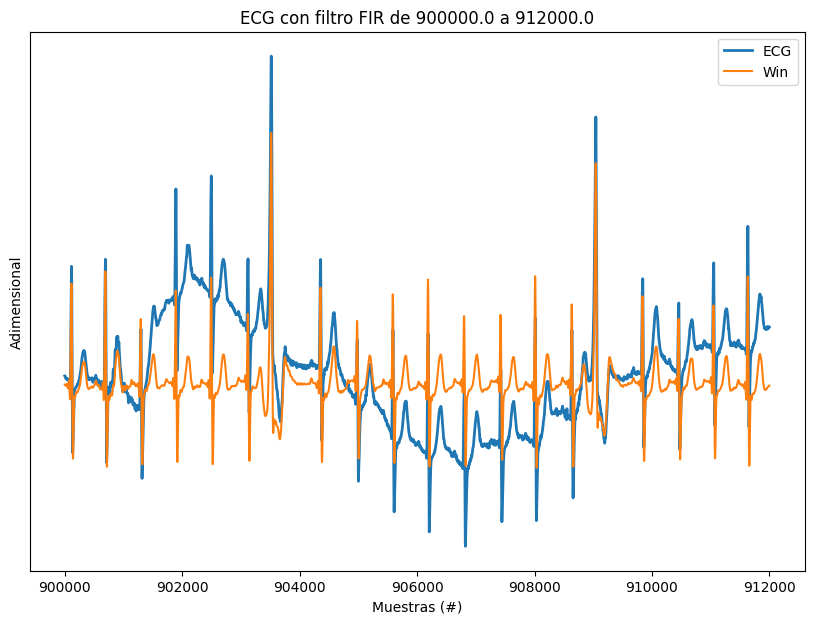

In [36]:
ECG_fir = signal.lfilter(taps, den_fir, ecg_one_lead)

demora = 1500


# Segmentos de interés con ALTA contaminación
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # Intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_fir[zoom_region + demora], label='Win')
    
    plt.title('ECG con filtro FIR de ' + str(ii[0]) + ' a ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

### 3.4 Filtrado Bidireccional con FIR

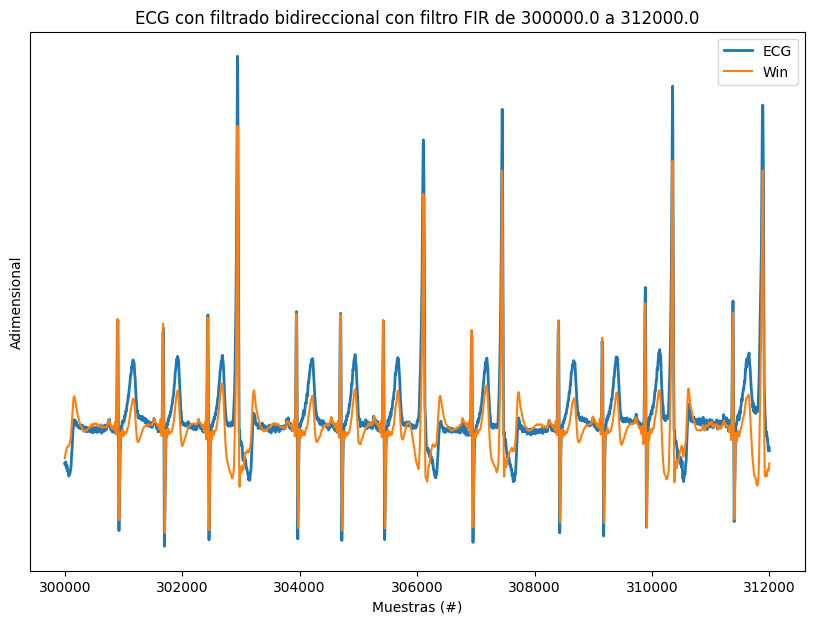

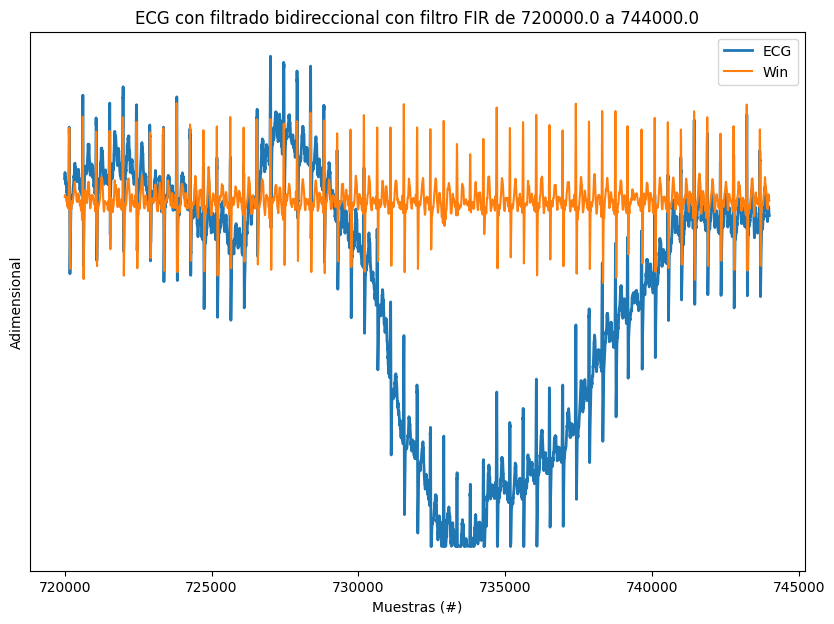

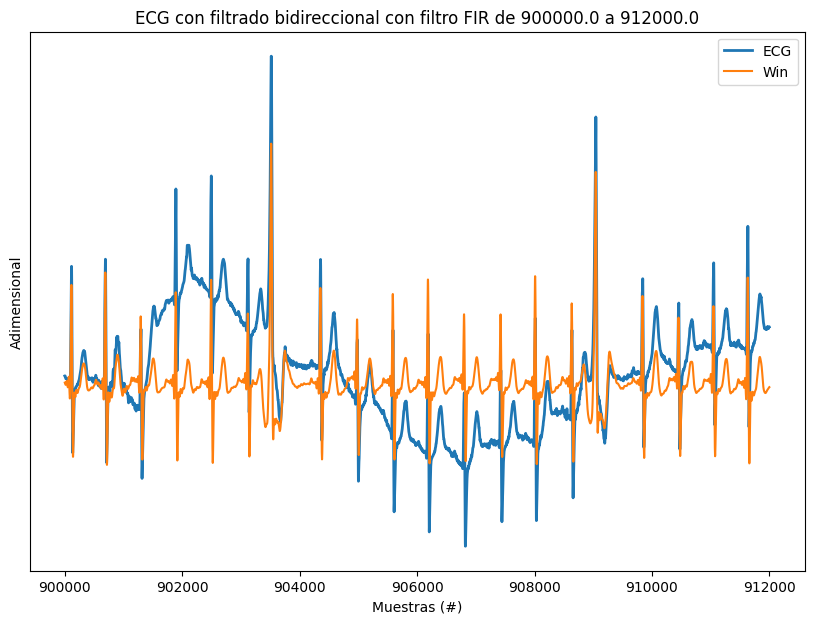

In [55]:
ECG_fir_b = signal.filtfilt(taps, den_fir, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # Intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_fir_b[zoom_region], label='Win')
    
    plt.title('ECG con filtrado bidireccional con filtro FIR de ' + str(ii[0]) + ' a ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

## 4 Comparativa

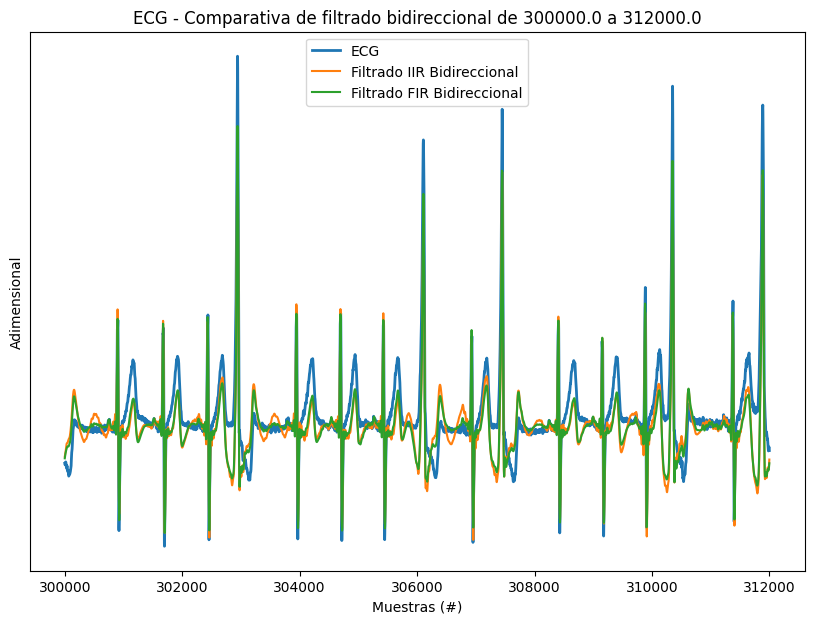

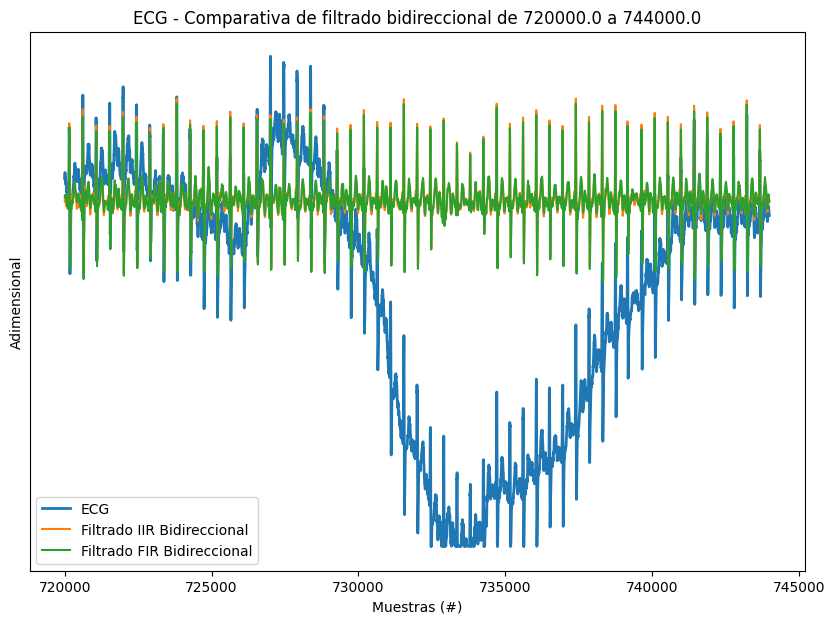

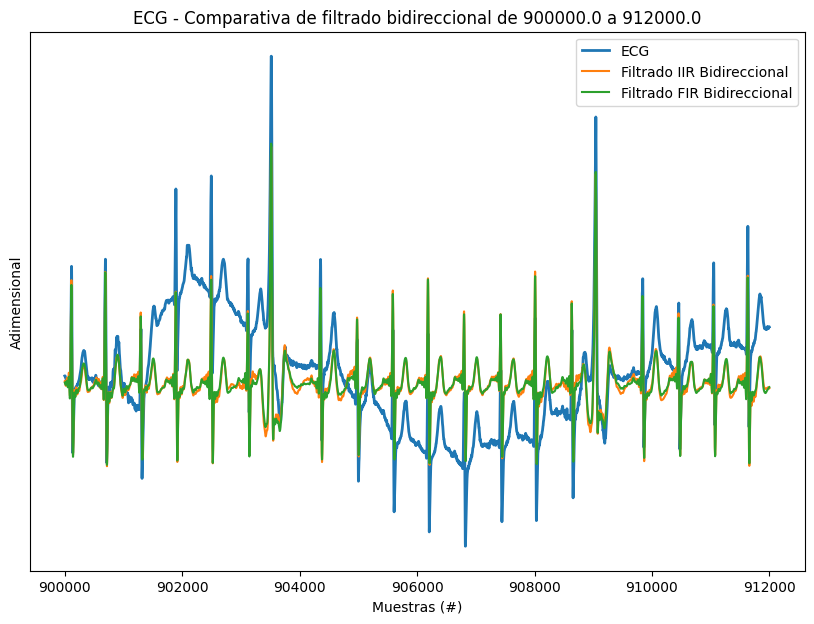

In [56]:
for ii in regs_interes:
    
    # Intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_iir_b[zoom_region ], label='Filtrado IIR Bidireccional')
    plt.plot(zoom_region, ECG_fir_b[zoom_region ], label='Filtrado FIR Bidireccional')
    
    plt.title('ECG - Comparativa de filtrado bidireccional de ' + str(ii[0]) + ' a ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()